# Trump's Tweet Analysis

## Importing the data into a Dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\arpit\\OneDrive\\Desktop\\trump_tweet.csv',encoding='unicode_escape')
df.head()

source                                               text  \
0  Twitter for iPhone                            https://t.co/hmcOfwHgAK   
1  Twitter for iPhone                            https://t.co/DlGXOvEjVq   
2  Twitter for iPhone  I will be interviewed by @seanhannity on @FoxN...   
3  Twitter for iPhone  RT @realDonaldTrump: Will be interviewed by @S...   
4  Twitter for iPhone  Retired Four Star General Jack Keane will rece...   

            created_at  retweet_count  favorite_count is_retweet  \
0  03-05-2020 04:16:20          12815           50277      False   
1  03-05-2020 04:03:48           9415           34519      False   
2  03-05-2020 02:03:37           7191           43862      False   
3  03-05-2020 02:00:41           9330               0       True   
4  03-05-2020 01:23:29          15217           83143      False   

                id_str  
0  1235418846758088704  
1  1235415690292662273  
2  1235385447813197831  
3  1235384709296816128  
4  1235375346494644224

## Choosing the relevant columns

In [3]:
df.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')

In [4]:
#adding an year column
df['created_at_year']=[i.split()[0][-4:] for i in df.created_at]

In [5]:
df=df[['created_at_year','text','retweet_count']]

In [6]:
df.head()

created_at_year                                               text  \
0            2020                            https://t.co/hmcOfwHgAK   
1            2020                            https://t.co/DlGXOvEjVq   
2            2020  I will be interviewed by @seanhannity on @FoxN...   
3            2020  RT @realDonaldTrump: Will be interviewed by @S...   
4            2020  Retired Four Star General Jack Keane will rece...   

   retweet_count  
0          12815  
1           9415  
2           7191  
3           9330  
4          15217

## Number of tweets per year

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of tweets')

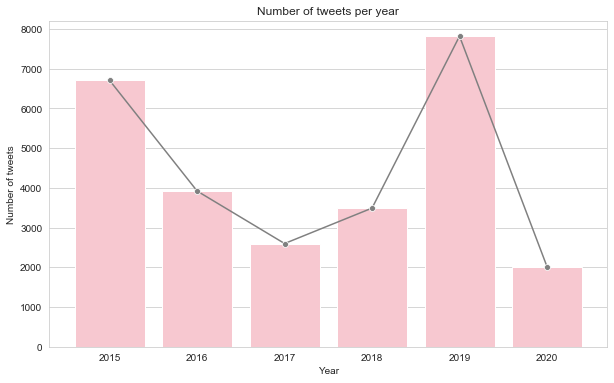

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.created_at_year.value_counts().index,
             y=df.created_at_year.value_counts().values,
             color='pink')
sns.lineplot(x=df.created_at_year.value_counts().index,
             y=df.created_at_year.value_counts().values,marker='o',
             color='grey')
sns.set_style('whitegrid')
plt.title('Number of tweets per year')
plt.xlabel('Year')
plt.ylabel('Number of tweets')

This line chart tells us that President Trump's tweet count started to decline till 2017 (when he was elected). The rise is in the number of tweets is extreme from 2018 to 2019, 2019 being the year he was most active on twitter. He has already tweeted about 2000 times since the beginning of 2020 and it's already march.

## Yearwise Analysis

In [9]:
from string import punctuation
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#creating an year list and sorting it
yearlist=list(df.created_at_year.value_counts().index)
yearlist.sort()

#Creating empty dictionaries to add handles,words, tweetstrings and polarity year wise
allhandles,allwords,alltweetstrings,allpolarity=[{} for i in range(4)]

for y in yearlist: # Considering one year at a time
    tweetstring=''
    tweetlist,hashtags,handles=[[] for i in range(3)]
    for i in df[df['created_at_year']==y].index:
        tweetstring = tweetstring + ' ' + df.loc[i, 'text']
        tweetlist.append(df.loc[i, 'text'])
    
    #Cleaning the strings
    #Removing urls
    tstr = re.sub(r'http\S+', ' ', tweetstring.strip(punctuation).lower())
    #Removing : and ,
    tstr = tstr.replace(':','').replace('.','')
    #Creating a list from cleaned text
    words = tstr.split()
    
    #adding to dictionaries with years as keys
    allwords[y]=words
    alltweetstrings[y]=tstr
    
    #Extracting handles and adding to dictionary
    handles=[]
    for w in words:
        if re.search(r'^@\w+', w):
            handles.append(w)
    allhandles[y]=handles
    
    #Finding polarity of tweets
    sentiment = {}
    polarity = [0]*len(tweetlist)
    len(polarity)
    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        print(sentiment[i], tweet)
        polarity[i] = sentiment[i]['compound']
    
    #Adding polarity to a dictionary
    allpolarity[y]=polarity

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.9559} i would like to wish everyone a happy and healthy new year. we must all work together to finally make america safe again and great again
{'neg': 0.126, 'neu': 0.827, 'pos': 0.047, 'compound': -0.4939} do you believe that the state department on new year's eve just released more of hillary's e-mails. they just want it all to end. bad
{'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.7814} thank you illinois! let's not forget to get family &amp; friends- out to vote in 2016!    
{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compound': 0.8261} happy birthday to my son @donaldjtrumpjr! very proud of you! #tbt    
{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.5267} i would feel sorry for @jebbush and how badly he is doing with his campaign other than for the fact he took millions of $'s of hit ads on me
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} makeamericagreatagain #trump2016  
{'neg': 0.0, 'neu': 0.785, 'pos':

{'neg': 0.097, 'neu': 0.755, 'pos': 0.147, 'compound': 0.34} refugees from syria are now pouring into our great country. who knows who they are - some could be isis. is our president insane
{'neg': 0.285, 'neu': 0.604, 'pos': 0.11, 'compound': -0.6387} i along with almost everyone else have so little confidence in president obama. he has a horrible attitude-a man who is resigned to defeat
{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.9604} so many great polls like reuters - big leads everywhere. new hampshire really special! we will win big and make america great again
{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.4199} thank you tennessee! #trump2016  
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.8172} just received a copy of @sarahpalinusa new book -- a great read! sarah is a terrific person
{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.784} great poll numbers out of @umassamherst. thank you! #trump2016 #makeamericagreatagain  
{'neg': 0.0, 'neu':

{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.8834} aviv1818: trumpachusetts: donald trump tops poll of bay state voters:   @foxnewspolitics ac360  thanks great news
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.7841} jaredchristophr: donald trump is the only person that can make this country great again @realdonaldtrump i fully agree
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.7712} bane1349: they all want jobs and a bright future. they know donald trump is the one and only choice to make that a reality!,10-25-2015 03:34:46,650,1542,false,658124513767464961
twitter for android,@christotepis: donald trump leads in expectations shows strength on attributes (poll) - abc news -   via @abc
{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296} politicalwire:bush has no money hes meeting today with mommy and daddy and theyre working on his campaign.  
{'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.5267} while jeb bush is cutting staff and salar

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} just read that "trump" has the largest (and i add most enthusiastic) crowds. tonight i will be in new hampshire - the place will be packed
{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.9081} i watched lightweight senator  marco rubio who is all talk and no action defend his weak position on illegal immigration. pathetic
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6588} great!  
{'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.4019} carl icahn said this about me:  "i think at this moment in time hes the only candidate that speaks out about the countrys problems
{'neg': 0.178, 'neu': 0.681, 'pos': 0.141, 'compound': -0.1779} definitely watch @carl_c_icahn s danger ahead. very insightful particularly on how corp inversions hurt america:  
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.8271} i hope when rand paul gets out of the racehe is at 1%--his supporters come over to me. i will do a much bette

{'neg': 0.142, 'neu': 0.521, 'pos': 0.337, 'compound': 0.6814} javonniandjeno: @realdonaldtrump @ap @nbc donald trump is clint eastwood the perfect hero not scared of american terrorists. vote trump
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.5859} just got back from the iowa state fair. record crowds phenomenal people. thank you iowa i will never let you down
{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4926} live on #periscope: good morning iowa! let's #makeamericagreatagain #trump2016   
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.93} in the plane heading to iowa state fair. will be great fun. hopefully giving helicopter rides to some of the kids
{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.802} making speech tonight in new hampshire - leaving now. fantastic people fantastic crowd
{'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound': -0.4939} ap and @huffingtonpost should change their fraudulent story to say that i dropped @nbc &amp; the appr

{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.2023} eugene_scott: i want people to come into the country. let it be legal" @realdonaldtrump   via @cnnpolitics
{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.9422} getting ready to go to las vegas (freedom fest) - great crowd. then on to amazing phoenix - that will be a total happening! love america
{'neg': 0.106, 'neu': 0.752, 'pos': 0.141, 'compound': 0.1989} gump6363: i always said i will not vote until i truly believe in a good leader you sir will get my vote! #makeamericagreatagain
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} phatwhodat: @realdonaldtrump trump 2016 yard signs. where can we get them?  everywhere
{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.4767} frank_lemoine: @realdonaldtrump the competition tries to fake it till they make it. trump the real deal
{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.6461} dannybo4455:  @mcgranejt @krauthammer @chucklane1 the establishment republ

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5883} gold4money: @thepatriot143  @realdonaldtrump trump is as honest as they come. he wants a border and doesn't hide it. #trumpforpresident
{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.8225} we have to bring back and cherish the middle class - once the backbone and true strength of the u.s.a. it can happen
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} nickcokley: @realdonaldtrump my first vote ever will be for one of the most historic businessmen in history.,06-25-2015 03:13:06,89,313,false,613907745318825985
twitter for android,@tarahollyfigure: @realdonaldtrump we are counting on you mr. trump. i believe you are the answer to #makeamericagreatagain
{'neg': 0.104, 'neu': 0.732, 'pos': 0.164, 'compound': 0.1436} danielamarino: @foxnews enough with #bush #clinton and the same faces every damn year. we need fresh new ppl that r not greedy. u r d one
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.6588} muni

{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.7959} needed: leaders who negotiate smart trade deals.only one knows the art of the deal. lets make america great again!  
{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9199} huge townhall tomorrow at 5pm in the nh barrington middle school! thanks to @straffordnhgop? for hosting! lets make america great again
{'neg': 0.131, 'neu': 0.79, 'pos': 0.079, 'compound': -0.2924} looking forward to touring the @sigsauerinc world headquarters tomorrow! one of the top gun manufacturers in the us! #gunrights #tcot
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.7424} thanks @renee2i for hosting me tomorrow at the two international group! looking forward to making new friends &amp; discussing #fitn topics
{'neg': 0.112, 'neu': 0.761, 'pos': 0.127, 'compound': 0.0772} donald trump trademarked reagan slogan &amp; would like to stop other republicans from using it   via @businessinsider
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'c

{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.8979} chris_r_2014: @wendypeters what i admire is that donald trump loves this country. he will put country over self and make america great
{'neg': 0.228, 'neu': 0.599, 'pos': 0.172, 'compound': -0.4423} tica1975: @realdonaldtrump @tmobile tmobile sucks can't believe someone like you would promote such a shitty company. compassionless co.,04-12-2015 02:07:25,20,44,false,587074510232358913
twitter for android,@chris_r_2014:  donald trump is the man to make this country great. obama/administration is an embarasssmnet and a complete joke
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rozanakabashi: @realdonaldtrump @johnlegere even though a costumer for so long their costumer service needs to be better.,04-12-2015 02:04:52,5,22,false,587073869678256129
twitter for android,@jamersonhayes: just keep doing what you're doing; a lot of americans believe in you you set the standard for what america was built upon
{'neg': 0.133, 'neu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} newhopenchange: reading the art of the deal for the 4th time over 18 years. motivational and educational in different ways each time
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6369} hgswiney: @realdonaldtrump is more than an entrepreneur... he's an american icon-and will definitely get my vote in 2016  thank you
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.8532} monkiekaty: @realdonaldtrump @russiannavyblog @joe3957 @jwil444 @dnorrell @greta @statedept @foxnews yes! yes! yes! trump for president??,03-12-2015 04:50:02,7,40,false,575881412378673152
twitter for android,@secondtonone8: the white house is waiting for you to move in mr. trump. @realdonaldtrump
{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.3818} russiannavyblog: @joe3957 @jwil444 @dnorrell @greta @statedept @foxnews if there is anything america desperately needs it's a trump run
{'neg': 0.085, 'neu': 0.624, 'pos': 0.291, 'compound': 0.7153} ch

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} darealkhefner: @realdonaldtrump you have my vote 
{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.7627} jsdedge: with all due respect why are you bluffing about running for president? i would vote for you!! we need a game changer!  watch!,01-31-2015 12:05:20,13,47,false,561495442576670720
twitter for android,@craig_eaton12: @realdonaldtrump please run for potus mr trump. the country needs you more then ever
{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.6948} priece714: if @realdonaldtrump ran for president that would make me so happy
{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.8176} catham11: @realdonaldtrump congrats trump it's a great location
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} tdavistonya: @realdonaldtrump @oreillyfactor trump for america
{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.8805} i hope you can go to @oreillyfactor and vote for donald trump in order to make america grea

{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4391} entrepreneurs:  be totally focused. know everything you can about what you're doing. give your work 100% of your concentrated effort
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} watch my appearance on @letterman from last night-  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} if you think you can do a thing or think you can't do a thing you're right. -- henry ford
{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.8433} carastarey: so glad the celebrity apprentice is back!! i love this show. @realdonaldtrump @apprenticenbc
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.7425} scooper1949p: hello mr. trump. i am very proud of you for saying what you said about guns in paris". i hope you become president
{'neg': 0.083, 'neu': 0.854, 'pos': 0.062, 'compound': 0.3927} erikmthompson: i just don't want #donaldtrump to run for president because that would mean no more #theapprentice  donald trumps letterm

{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.6114} rt @realdonaldtrump: happy birthday @donaldjtrumpjr! 
{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114} happy birthday @donaldjtrumpjr! 
{'neg': 0.283, 'neu': 0.528, 'pos': 0.189, 'compound': -0.4388} happy new year to all including to my many enemies and those who have fought me and lost so badly they just don't know what to do. love
{'neg': 0.127, 'neu': 0.675, 'pos': 0.198, 'compound': 0.2003} russians are playing @cnn and @nbcnews for such fools - funny to watch they don't have a clue! @foxnews totally gets it
{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249} join @american32 founded by hall of fame legend @jimbrownnfl32 on 1/19/2017 in washington d.c.  
{'neg': 0.119, 'neu': 0.516, 'pos': 0.366, 'compound': 0.6997} great move on delay (by v. putin) - i always knew he was very smart
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} my administration will follow two simple rules:  
{'neg': 0.0, '

{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019} hillaryclinton's tax hikes will crush our economy. i will cut taxes -- big league.    
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612} hillaryclinton talking about jobs? remember what she promised upstate new york. #bigleaguetruth#debates  
{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.6249} hillaryclinton has been a foreign policy disaster for the american people. i will #makeamericastrongagain #debate  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} moderator: hillary plan calls for more regulation and more government spending. #debate #bigleaguetruth
{'neg': 0.593, 'neu': 0.407, 'pos': 0.0, 'compound': -0.8805} hillaryclinton- you have failed failed and failed. #bigleaguetruthtime to #draintheswamp!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} hillary has called for 550% more syrian immigrants but wont even mention radical islamic terrorists. #debate  
{'neg': 0.0, 'neu': 1.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} meequalsfree: looking forward to seeing you again! everett to be a packed house! @realdonaldtrump  @mike_pence
{'neg': 0.209, 'neu': 0.656, 'pos': 0.135, 'compound': -0.3119} from day one i said that i was going to build a great wall on the southern border and much more. stop illegal immigration. watch wednesday
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3595} join me this thursday in wilmington ohio at noon! #imwithyoutickets:    
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3595} join me this wednesday in phoenix arizona at 6pm! #imwithyoutickets:    
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} makeamericagreatagain #imwithyou  
{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.8356} we will repeal and replace the horrible disaster known as #obamacare!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} crookedhillary  
{'neg': 0.147, 'neu': 0.798, 'pos': 0.055, 'compound': -0.4939} now th

{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.5267} i have self funded my winning primary campaign with an approx. $50 million loan. i have totally terminated the loan
{'neg': 0.147, 'neu': 0.662, 'pos': 0.191, 'compound': 0.0534} the very dishonest @nbcnews refuses to accept the fact that i have forgiven my $50 million loan to my campaign. done deal
{'neg': 0.058, 'neu': 0.792, 'pos': 0.15, 'compound': 0.4939} one of the reasons hillary hid her emails was so the public wouldn't see how she got rich- selling out america.  
{'neg': 0.222, 'neu': 0.702, 'pos': 0.076, 'compound': -0.5411} why would college graduates want crooked hillary as their president? she will destroy them!  
{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.5697} new book by @ericbolling is absolutely terrific and a must read! #wakeupamerica
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} the story with hillary will never change.  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @drudge_

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} redrising11: ????i am a woman &amp; i just voted for @realdonaldtrump #nebraskaprimary #trump2016 #trumpforpresident  
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612} thank you jason greenblatt @jasondovesq "for our children: let's elect donald trump"   
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019} rt @greta: interesting poll results so far (and go vote on    
{'neg': 0.158, 'neu': 0.755, 'pos': 0.087, 'compound': -0.2263} i am lowering taxes far more than any other candidate. any negotiated increase by congress to my proposal would still be lower than current
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.4019} i will have set the all time record in primary votes in the republican party --despite having to compete against 17 other people
{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612} if i only had 1 person running against me in the primaries like hillary clinton i would have gotten

{'neg': 0.161, 'neu': 0.742, 'pos': 0.097, 'compound': -0.2516} the reason lyin' ted cruz has lost so much of the evangelical vote is that they are very smart and just don't tolerate liars-a big problem
{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.7717} crazy @megynkelly is now complaining that  @oreillyfactor did not defend her against me - yet her bad show is a total hit piece on me.tough
{'neg': 0.074, 'neu': 0.775, 'pos': 0.151, 'compound': 0.4767} great news that @foxnews has cancelled the additional debate. how many times can the same people ask the same question? i beat cruz debating
{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.9227} crazy @megynkelly supposedly had lyin' ted cruz on her show last night. ted is desperate and his lying is getting worse. ted can't win
{'neg': 0.286, 'neu': 0.625, 'pos': 0.089, 'compound': -0.7184} stuart stevens the failed campaign manager of mitt romney's historic loss is now telling the republican party what to do with trum

{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.34} why would the people of florida vote for marco rubio when he defrauded them by agreeing to represent them as their senator and then quit
{'neg': 0.163, 'neu': 0.499, 'pos': 0.337, 'compound': 0.7108} have a good chance to win texas on tuesday. cruz is a nasty guy not one senate endorsement and despite talk gets nothing done. loser
{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2263} i will be making a speech at 12:00 in fort worth texas. really big crowd expected. will be talking about the debate last night-plus plus
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} waltseher: @realdonaldtrump @morg25016893 @eventbrite yup 200 polish immigrants were hired by his contractor not trump
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.6239} mjp1370: @realdonaldtrump cruz talks about hillary all the time because he knows he can't beat you ! trump will win texas 
{'neg': 0.154, 'neu': 0.679, 'pos': 0.167, 'compound'

{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404} billrey16929057: @seanhannity #hannity @realdonaldtrump is the only hope to #makeamericagreatagain
{'neg': 0.127, 'neu': 0.787, 'pos': 0.086, 'compound': -0.2732} ukcatwoman52: @ericnlin @ac360 all candidates liars. trump is the only one that speak the truth people need to hear what trump is saying
{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.9258} autumnandews08: @realdonaldtrump trump will win the debate like he has won all the others! he is heads above the rest! #votetrump thanks
{'neg': 0.262, 'neu': 0.658, 'pos': 0.08, 'compound': -0.608} ericnlin: @ac360 donaldtrump: no raise in 8 years home not worth what i paid for it healthcare is a joke obama is a liar.  trump 2016
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732} border agent: "we might as well abolish our immigration laws altogether" 
{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3595} i said this was happening long ago- i will stop 

{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.8439} happy new year! we are making america great again and much faster than anyone thought possible
{'neg': 0.212, 'neu': 0.385, 'pos': 0.402, 'compound': 0.8841} as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year. 2018 will be a great year for america
{'neg': 0.163, 'neu': 0.673, 'pos': 0.164, 'compound': -0.2456} iran the number one state of sponsored terror with numerous violations of human rights occurring on an hourly basis has now closed down the internet so that peaceful demonstrators cannot communicate. not good
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.865} what a year its been and we're just getting started. together we are making america great again! happy new year!!  
{'neg': 0.139, 'neu': 0.619, 'pos': 0.242, 'compound': 0.6114} my deepest condolences to the victims of the te

{'neg': 0.052, 'neu': 0.583, 'pos': 0.366, 'compound': 0.8655} our hearts are with all affected by the wildfires in california. god bless our brave first responders and @fema team. we support you!  
{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -0.4926} the current tax code is a burden on american taxpayers &amp; harmful to job-creators. americans need #taxreform! more:    
{'neg': 0.105, 'neu': 0.837, 'pos': 0.058, 'compound': -0.3153} i am supportive of lamar as a person &amp; also of the process but i can never support bailing out ins co's who have made a fortune w/ o'care
{'neg': 0.283, 'neu': 0.717, 'pos': 0.0, 'compound': -0.7717} democrat congresswoman totally fabricated what i said to the wife of a soldier who died in action (and i have proof). sad
{'neg': 0.091, 'neu': 0.717, 'pos': 0.192, 'compound': 0.4767} the nfl has decided that it will not force players to stand for the playing of our national anthem. total disrespect for our great country
{'neg': 0.147, 'neu': 0.

{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.8439} wonderful coordination between federal state and local governments in the great state of texas - teamwork! record setting rainfall
{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.9041} thank you to all of the great volunteers helping out with #hurricaneharvey relief in texas!  
{'neg': 0.073, 'neu': 0.755, 'pos': 0.172, 'compound': 0.5204} closely monitoring #hurricaneharvey from camp david. we are leaving nothing to chance. city state and federal govs. working great together
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8826} chuckgrassley - got your message loud and clear. we have fantastic people on the ground got there long before #harvey. so far so good
{'neg': 0.225, 'neu': 0.697, 'pos': 0.078, 'compound': -0.5574} rt @vp: all americans in harms way need to be prepared and should continue visiting   for critical updates on #hurric
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @epascottpruitt:

{'neg': 0.288, 'neu': 0.456, 'pos': 0.256, 'compound': -0.2263} a new intelligence leak from the amazon washington postthis time against a.g. jeff sessions.these illegal leaks like comey's must stop
{'neg': 0.18, 'neu': 0.58, 'pos': 0.24, 'compound': 0.3716} sean spicer is a wonderful person who took tremendous abuse from the fake news media - but his future is bright
{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.755} today it was my privilege to welcome survivors of the #ussarizona to the @whitehouse. #honorthem????remarks:    
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.6705} today it was my privilege to welcome survivors of the #ussarizona to the wh. remarks:    
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5423} manufacturers record-high optimism reported in the 1st qtr has carried into the 2nd qtr of 2017 via @shopfloornam:   
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.7746} icymi- this week we hosted a #madeinamerica event right here at 

{'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.7579} getting great border security and healthcare. #voteralphnorman tomorrow
{'neg': 0.058, 'neu': 0.698, 'pos': 0.244, 'compound': 0.7003} ralph norman who is running for congress in sc's 5th district will be a fantastic help to me in cutting taxes and
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.594} my heartfelt thoughts and prayers are with the 7 @usnavy sailors of the #ussfitzgerald and their families. ??  
{'neg': 0.273, 'neu': 0.596, 'pos': 0.132, 'compound': -0.6705} the dems want to stop tax cuts good healthcare and border security.their obamacare is dead with 100% increases in p's. vote now for karen h
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} jay sekulow on @foxandfriends now
{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.6114} rt @whitehouse: happy father's day!  
{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.9174} camp david is a very special place. an honor to have spent the weeken

{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.2732} i received calls from the president of mexico and the prime minister of canada asking to renegotiate nafta rather than terminate. i agreed
{'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.7906} democrats are trying to bail out insurance companies from disastrous #obamacare and puerto rico with your tax dollars. sad
{'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.9477} a great great honor to welcome &amp; recognize the national teacher of the year as well as the teacher of the year fro  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} today i signed an executive order on enforcing statutory prohibitions on federal control of education. eo:  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} today i signed an executive order @ the u.s. dept. of @interior: 'review of designations under the antiquities act  
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6114} happy birthday to our @flotus melan

{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.6868} wonderful meeting with canadian pm @justintrudeau and a group of leading ceo's &amp; business women from canada????and th  
{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.5093} welcome to the @whitehouse prime minister @justintrudeau!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} today i will meet with canadian pm trudeau and a group of leading business women to discuss women in the workforce.  
{'neg': 0.235, 'neu': 0.563, 'pos': 0.202, 'compound': -0.2484} just leaving florida. big crowds of enthusiastic supporters lining the road that the fake news media refuses to mention. very dishonest
{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.8402} congratulations stephen miller- on representing me this morning on the various sunday morning shows. great job
{'neg': 0.203, 'neu': 0.705, 'pos': 0.092, 'compound': -0.6339} i know mark cuban well. he backed me big-time but i wasn't interested in taking all o

{'neg': 0.238, 'neu': 0.66, 'pos': 0.102, 'compound': -0.5114} somebody hacked the dnc but why did they not have "hacking defense" like the rnc has and why have they not responded to the terrible
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.5719} thank you to ford for scrapping a new plant in mexico and creating 700 new jobs in the u.s. this is just the beginning - much more to follow
{'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compound': -0.6115} foxnews: julian assange on u.s. media coverage: its very dishonest. #hannity   more dishonest than anyone knows
{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.7133} julian assange said "a 14 year old could have hacked podesta" - why was dnc so careless? also said russians did not give him the info
{'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.4576} the "intelligence" briefing on so-called "russian hacking" was delayed until friday perhaps more time needed to build a case. very strange
{'neg': 0.0, 'neu': 0.828, 'po

{'neg': 0.188, 'neu': 0.755, 'pos': 0.058, 'compound': -0.8041} which it was not (but even if it was it is only a civil case like obamas - but it was done correctly by a lawyer and there would not even be a fine. lawyers liability if he made a mistake not me). cohen just trying to get his sentence reduced. witch hunt
{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.7003} democrats cant find a smocking gun tying the trump campaign to russia after james comeys testimony. no smocking gun...no collusion. @foxnews  thats because there was no collusion. so now the dems go to a simple private transaction wrongly call it a campaign contribution
{'neg': 0.06, 'neu': 0.816, 'pos': 0.124, 'compound': 0.5095} i am in the process of interviewing some really great people for the position of white house chief of staff. fake news has been saying with certainty it was nick ayers a spectacular person who will always be with our #maga agenda. i will be making a decision soon
{'neg': 0.06, '

{'neg': 0.174, 'neu': 0.605, 'pos': 0.221, 'compound': 0.2481} jeff flake(y) doesnt want to protect the non-senate confirmed special counsel he wants to protect his future after being unelectable in arizona for the crime of doing a terrible job! a weak and ineffective guy
{'neg': 0.26, 'neu': 0.586, 'pos': 0.154, 'compound': -0.5994} as soon as democrats sent their best election stealing lawyer marc elias to broward county they miraculously started finding democrat votes. dont worry florida - i am sending much better lawyers to expose the fraud
{'neg': 0.146, 'neu': 0.814, 'pos': 0.039, 'compound': -0.5499} you mean they are just now finding votes in florida and georgia  but the election was on tuesday? lets blame the russians and demand an immediate apology from president putin
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.8316} briankempga ran a great race in georgia  he won. it is time to move on
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215} president

{'neg': 0.06, 'neu': 0.805, 'pos': 0.135, 'compound': 0.5093} congressman @rodblum of iowa got a desperately needed flood wall for cedar rapids that was almost impossible to get. he makes a big difference for iowa! border military vets etc. we need rod in d.c. he has my strong endorsement
{'neg': 0.048, 'neu': 0.679, 'pos': 0.273, 'compound': 0.8826} denver4va of the 5th district in virginia is a popular guy who really knows how to get the job done! really big help with tax cuts the military and our great vets. he has my total endorsement
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9517} erikpaulson @jasonlewis @jimhagedornmn and @petestauber love our country and the great state of minnesota. they are winners and always get the job done we need them all in congress for #maga. border military vets 2nd a. go vote minnesota. they have my strong endorsement
{'neg': 0.047, 'neu': 0.686, 'pos': 0.267, 'compound': 0.8826} congressman @denverriggleman of the 5th district in virginia

{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.8856} looks to be a cat. 3 which is even more intense than florence. good news is the folks in the pan handle can take care of anything. @fema and first responders are ready - be prepared! #hurricanemichael
{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.34} hurricane on its way to the florida pan handle with major elements arriving tomorrow. could also hit in later stage parts of georgia and unfortunately north carolina and south carolina again
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939} big announcement with my friend ambassador nikki haley in the oval office at 10:30am
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @realdonaldtrump:  
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.6468} will be going to iowa tonight for rally and more! the farmers (and all) are very happy with usmca
{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.9348} great evening last night at the white house ho

{'neg': 0.105, 'neu': 0.758, 'pos': 0.137, 'compound': 0.4215} immediately after comeys firing peter strzok texted to his lover lisa page we need to open the case weve been waiting on now while andy (mccabe also fired) is acting. page answered we need to lock in (redacted). in a formal chargeable way. soon. wow a conspiracy caught
{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.8347} lisa page testimony- no evidence of collusion before mueller appointment. @foxnews by catherine herridge. therefore the case should never have been allowed to be brought. it is a totally illegal witch hunt
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} our steel industry is the talk of the world. it has been given new life and is thriving. billions of dollars is being spent on new plants all around the country
{'neg': 0.042, 'neu': 0.875, 'pos': 0.083, 'compound': 0.4447} tariffs have put the u.s. in a very strong bargaining position with billions of dollars and jobs flowing into our 

{'neg': 0.111, 'neu': 0.799, 'pos': 0.09, 'compound': -0.296} there is no political necessity to keep canada in the new nafta deal. if we dont make a fair deal for the u.s. after decades of abuse canada will be out. congress should not interfere w/ these negotiations or i will simply terminate nafta entirely &amp; we will be far better off
{'neg': 0.111, 'neu': 0.799, 'pos': 0.09, 'compound': -0.296} there is no political necessity to keep canada in the new nafta deal. if we dont make a fair deal for the u.s. after decade of abuse canada will be out. congress should not interfere with these negotiations or i will simply terminate nafta entirely &amp; we will be far better off
{'neg': 0.099, 'neu': 0.845, 'pos': 0.056, 'compound': -0.2732} donald trump and now we find out that there wasnt even a hearing - that donald trumps 4th amendment right to privacy was signed away...and someone in there is swearing that this stuff is true when it wasnt? this is the scandal here - a police sta

{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8883} scott walker of wisconsin is a tremendous governor who has done incredible things for that great state. he has my complete &amp; total endorsement! he brought the amazing foxconn to wisconsin with its 15000 jobs-and so much more. vote for scott on tuesday in the republican primary
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.34} trumps foreign policy is actually boosting americas standing  
{'neg': 0.023, 'neu': 0.697, 'pos': 0.28, 'compound': 0.938} it was my great honor to sign our new defense bill into law and to pay tribute to the greatest soldiers in the history of the world: the u.s. army. the national defense authorization act is the most significant investment in our military and our warfighters in modern history!  
{'neg': 0.069, 'neu': 0.668, 'pos': 0.263, 'compound': 0.872} pete stauber is running for congress in minnesota. he will make for a great congressman. pete is strong on crime and borders love

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588} making america great again!  
{'neg': 0.145, 'neu': 0.557, 'pos': 0.298, 'compound': 0.742} a highly respected federal judge today stated that the trump administration gets great credit for reuniting illegal families. thank you and please look at the previous administrations record - not good
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.636} congratulations to our new @deptvetaffairs secretary robert wilkie!  
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.9638} thank you to @randpaul for your yes on a future great justice of the supreme court brett kavanaugh. your vote means a lot to me and to everyone who loves our country
{'neg': 0.085, 'neu': 0.654, 'pos': 0.262, 'compound': 0.743} that open borders large scale crime and abolishing ice is good for them we must get smart and finally do what must be done for the safety and security of our country
{'neg': 0.234, 'neu': 0.533, 'pos': 0.234, 'compound': -0.

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199} thank you #nato2018!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} natosummit2018 press conference in brussels belgium: 
{'neg': 0.038, 'neu': 0.803, 'pos': 0.158, 'compound': 0.6286} on top of it all germany just started paying russia the country they want protection from billions of dollars for their energy needs coming out of a new pipeline from russia. not acceptable! all nato nations must meet their 2% commitment and that must ultimately go to 4
{'neg': 0.143, 'neu': 0.79, 'pos': 0.066, 'compound': -0.296} presidents have been trying unsuccessfully for years to get germany and other rich nato nations to pay more toward their protection from russia. they pay only a fraction of their cost. the u.s. pays tens of billions of dollars too much to subsidize europe and loses big on trade
{'neg': 0.13, 'neu': 0.83, 'pos': 0.039, 'compound': -0.5868} as i head out to a very important nato meeting i see that fbi lover/age

{'neg': 0.147, 'neu': 0.712, 'pos': 0.141, 'compound': -0.9852} the real big story that affects everybody in america is the success of @potus's tax cut package and what it's done for our economy... @varneyco   20:25:24,11608,47038,false,1009895079631351808
media studio,my administration is acting swiftly to address the illegal immigration crisis on the southern border. loopholes in our immigration laws all supported by extremist open border democrats...and that's what they are - they're extremist open border democrats....   17:02:40,19376,70977,false,1009844059211366401
twitter for iphone,democrats want open borders where anyone can come into our country and stay. this is nancy pelosis dream. it wont happen!,06-21-2018 14:38:15,25463,104682,false,1009807715798044672
twitter for iphone,henry mcmaster has done a great job as governor of south carolina. the state is booming with jobs and new industry setting records. he is tough on crime and strong on borders healthcare the military an

{'neg': 0.17, 'neu': 0.83, 'pos': 0.0, 'compound': -0.8398} the failing @nytimes quotes a senior white house official who doesnt exist as saying even if the meeting were reinstated holding it on june 12 would be impossible given the lack of time and the amount of planning needed. wrong again! use real people not phony sources
{'neg': 0.166, 'neu': 0.766, 'pos': 0.067, 'compound': -0.743} unlike what the failing and corrupt new york times would like people to believe there is zero disagreement within the trump administration as to  how to deal with north korea...and if there was it wouldnt matter. the @nytimes has called me wrong right from the beginning
{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.957} thanks to very brave teacher &amp; hero jason seaman of noblesville indiana for his heroic act in saving so many precious young lives. his quick and automatic action is being talked about all over the world
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.8316} look

{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.8504} having great meetings and discussions with my friend president @emmanuelmacron of france. we are in the midst of meetings on iran syria and trade. we will be holding a joint press conference shortly here at the @whitehouse. ????????  
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8402} rt @mike_pence: proud to support our friend @votemarsha for us senate representing tennessee. marsha blackburn is a rock-ribbed conservativ
{'neg': 0.093, 'neu': 0.741, 'pos': 0.167, 'compound': 0.34} heres a great stat - since january 2017 the number of people forced to use food stamps is down 1.9 million. the american people are finally back to work
{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'compound': -0.368} mexico whose laws on immigration are very tough must stop people from going through mexico and into the u.s. we may make this a condition of the new nafta agreement. our country cannot accept what is happening! also we must 

{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9617} i am pleased to announce that effective 4/9/18 @ambjohnbolton will be my new national security advisor. i am very thankful for the service of general h.r. mcmaster who has done an outstanding job &amp; will always remain my friend. there will be an official contact handover on 4/9
{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.7177} my honor charlie - thank you! #maga  
{'neg': 0.176, 'neu': 0.587, 'pos': 0.237, 'compound': 0.4019} as a candidate i pledged that if elected i would use every lawful tool to combat unfair trade protect american workers and defend our national security.  today we took another critical step to fulfill that commitment.    
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215} rt @flotus: greetings from @whitehouse  
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.9311} remember when they were saying during the campaign that donald trump is giving great speeches and drawing big crow

{'neg': 0.267, 'neu': 0.698, 'pos': 0.035, 'compound': -0.9233} immediately fire back if a savage sicko came to a school with bad intentions. highly trained teachers would also serve as a deterrent to the cowards that do this. far more assets at much less cost than guards. a gun free school is a magnet for bad people. attacks would end
{'neg': 0.093, 'neu': 0.708, 'pos': 0.199, 'compound': 0.743} i never said give teachers guns like was stated on fake news @cnn &amp; @nbc. what i said was to look at the possibility of giving concealed guns to gun adept teachers with military or special training experience - only the best. 20% of teachers a lot would now be able to
{'neg': 0.078, 'neu': 0.738, 'pos': 0.184, 'compound': 0.7081} i will always remember the time i spent today with courageous students teachers and families. so much love in the midst of so much pain. we must not let them down. we must keep our children safe!!full listening session:    
{'neg': 0.072, 'neu': 0.873, 'pos':

{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'compound': 0.0772} in new quinnipiac poll 66% of people feel the economy is excellent or good. that is the highest number ever recorded by this poll
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.594} disproven and paid for by democrats dossier used to spy on trump campaign. did fbi use intel tool to influence the election? @foxandfriends  did dems or clinton also pay russians? where are hidden and smashed dnc servers? where are crooked hillary emails?  what a mess
{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.7943} good news: toyota and mazda announce giant new huntsville alabama plant which will produce over 300000 cars and suvs a year and employ 4000 people. companies are coming back to the u.s. in a very big way. congratulations alabama
{'neg': 0.037, 'neu': 0.792, 'pos': 0.17, 'compound': 0.7494} cutting taxes and simplifying regulations makes america the place to invest! great news as toyota and mazda announce they 

{'neg': 0.225, 'neu': 0.708, 'pos': 0.067, 'compound': -0.6673} rt @whitehouse: americans saw plenty of washington at its worst this yearbut despite getting no help from the far left america today is s
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} how is the paris accord doing? dont ask!  
{'neg': 0.273, 'neu': 0.497, 'pos': 0.23, 'compound': -0.1759} wonderful account of u.s. embassy (iraq) vs. the benghazi disaster!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} get this straightened out governor @gavinnewsom  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @jackposobiec: breaking: us marines arriving to baghdad embassy  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} how is the paris accord doing? dont ask!  @parisac  
{'neg': 0.273, 'neu': 0.497, 'pos': 0.23, 'compound': -0.1759} wonderful account of u.s. embassy (iraq) vs. the bengahzi disaster!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @cortessteve: looking bigger picture th

{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.7783} rt @repratcliffe: if there was ever a time to vote hell no this was it.  
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199} thank you! #kag  
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.4199} thank you michigan i am on my way. see everybody soon! #kag  
{'neg': 0.324, 'neu': 0.592, 'pos': 0.084, 'compound': -0.8271} such atrocious lies by the radical left do nothing democrats. this is an assault on america and an assault on the republican party
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.671} wont convict and remove the president - then the house should not be impeaching the president in the first place. if this is the new standard every president from here on out is impeachable.  andy mccarthy @foxnews  so well stated. thank you
{'neg': 0.049, 'neu': 0.895, 'pos': 0.056, 'compound': 0.0772} in the end here nothing happened. we dont a

{'neg': 0.165, 'neu': 0.647, 'pos': 0.188, 'compound': 0.1027} rt @donaldjtrumpjr: ig report confirms schiff memo media praised was riddled with lies  
{'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'compound': -0.5994} rt @tomfitton: mr. comey stole @realdonaldtrump's confidential fbi records and leaked them. and lied about it to investigators.  
{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'compound': -0.9001} rt @repleezeldin: with this disgusting impeachment charade house democrats have proven themselves guilty of abuse of power and obstruction
{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296} rt @donaldjtrumpjr: media research center files fec complaint against bloomberg news | the dan bongino show  
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6908} rt @donaldjtrumpjr: he's 100% right to think that. does anyone actually believe comey strozk etc etc acted in good faith towards @realdon
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.8854} rt @kimguilfoyle: so 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} this is the real story behind the do nothing democrats!  
{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.5994} rt @loudobbs: a tremendous week. @potus says he wants a full senate trial following the dems disastrous impeachment hearings. @presssec
{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3595} rt @loudobbs: case closed! @saracarterdc @charleshurt say the radical dems have no case or evidence to impeach @potus. #maga #americafirst
{'neg': 0.187, 'neu': 0.618, 'pos': 0.194, 'compound': 0.1025} too bad we didnt have the g-7 here. i offered to pick up the entire cost would have saved at least $35000000 for the usa. best location. very stupid people thought i would gain. wrong! looking at camp david. will announce soon.  
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.5984} polls have now turned very strongly against impeachment especially in swing states. 75% to 25%. thank you
{'neg': 0.164, 'neu': 0

{'neg': 0.077, 'neu': 0.812, 'pos': 0.111, 'compound': 0.2023} rt @stevescalise: the dems' star witness was just asked on record if she had any information regarding @realdonaldtrump accepting any bribe
{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.25} rt @gopleader: before chairman adam schiff gets a chance to make up another phone call between presidents trump and zelensky @devinnunes j
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @jim_jordan:  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @danscavino: ukrainian fm vadym prystaiko said on thur that the u.s. amb did not link financial military assistance to a request for uk
{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.296} rt @jim_jordan: we now have both the april and july calls between president trump and president zelensky. once again no linkage of any kin
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @repmarkmeadows: bravo from @repchrisstewart who just summarized this wh

{'neg': 0.0, 'neu': 0.974, 'pos': 0.026, 'compound': 0.0644} virginia with all of the massive amount of defense and other work i brought to you and with everything planned go out and vote republican today. i know the dems are saying that they have your vote locked up but that would mean a long slide down. vote republican today
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.8225} rt @trumpwarroom: "we support protect and defend the constitution""we stand with the incredible heroes and warriors of law enforcement.
{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'compound': 0.0772} rt @trumpwarroom: "so today we just hit the highest number in the history of the stock market. ... that's for everybody. your 401(k)'s ho
{'neg': 0.19, 'neu': 0.648, 'pos': 0.162, 'compound': -0.4019} rt @trumpwarroom: "american special forces gave the world's number one terrorist a one-way ticket to hell." - president trump speaks in l
{'neg': 0.225, 'neu': 0.698, 'pos': 0.078, 'compound': -0.5859} rt @trump

{'neg': 0.162, 'neu': 0.604, 'pos': 0.234, 'compound': 0.5838} mississippi! there is a very important election for governor on november 5th. i need you to get out and vote for our great republican nominee @tatereeves. tate is strong on crime tough on illegal immigration and will protect your second amendment
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8313} he loves our military and supports our vets! democrat jim hood will never give us his vote is anti-trump and pro-crooked hillary. get out and vote for tate reeves on november 5th. he has my complete and total endorsement
{'neg': 0.069, 'neu': 0.85, 'pos': 0.082, 'compound': 0.126} louisiana! extreme democrat john bel edwards has sided with nancy pelosi and chuck schumer to support sanctuary cities high taxes and open borders. he is crushing louisianas economy and your second amendment rights
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.9118} our republican candidate @eddierispone is a successful conservative bu

{'neg': 0.226, 'neu': 0.323, 'pos': 0.451, 'compound': 0.3382} thank you working hard!  
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.062, 'neu': 0.782, 'pos': 0.155, 'compound': 0.5647} guatemala honduras &amp; el salvador have all signed historic asylum cooperation agreements and are working to end the scourge of human smuggling. to further accelerate this progress the u.s. will shortly be approving targeted assistance in the areas of law enforcement &amp; security
{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9463} senator rand paul just wrote a great book the case against socialism which is now out. highly recommended  as america was founded on liberty &amp; independence  not government coercion domination &amp; control. we were born free and will stay free as long as i am your president
{'neg': 0.357, 'neu': 0.588, 'pos': 0.055, 'compound': -0.9311} republicans are totally deprived of their rights in this impeachment witch hunt. no lawyers no ques

{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2732} rt @whitehouse: president @realdonaldtrump just signed two new trade agreements with japan changing the game for american farmers and ranc
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4926} rt @presssec: our commander-in-chief @realdonaldtrump has made it his priority to keep this country safe and empower our military leaders!
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.8519} rt @clewandowski_: great to be on with @loudobbs reminding the american people of the promises made promises kept by @realdonaldtrump http
{'neg': 0.212, 'neu': 0.683, 'pos': 0.104, 'compound': -0.4588} rt @parscale: the radical mayor of minneapolis @jacob_frey is abusing his power in an attempt to block the president's supporters from se
{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2263} rt @stevescalise: this entire process has been a scam.dems now plan to only allow themselves and their staff to know the whistleblowers

{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.6239} rt @realdonaldtrump: will happen to all of those seeking unlawful impeachment in 50 trump type districts. we will win big!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @realdonaldtrump:  
{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.5255} rt @lukepascal2: the real one mark levin just totally curved ed henry and his fake news. career is gone now! can we face off levin and worl
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} investigating corruption is correct!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @steventatkinson: mark levin just mopped the floor with ed henry. #ukrainescandal
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @jnedster: saw the whole interview by @marklevinshow with ed henry. why arent there more reporters that can explain and bring the news
{'neg': 0.227, 'neu': 0.669, 'pos': 0.104, 'compound': -0.5106} rt @marygoulet: @jackposobiec ed henry has 

{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.636} all based on nothing! the dems cant get anything positive done and probably dont want to.  
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199} thank you billy!  
{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4199} thank you!  
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6369} rt @gopchairwoman: our data shows @realdonaldtrumps approval among hispanic americans in texas has increased by 20% since 2016. that mea
{'neg': 0.196, 'neu': 0.526, 'pos': 0.277, 'compound': 0.1761} rt @gopchairwoman: .@realdonaldtrump is fully committed to defending america and bringing terrorists to justice. 
{'neg': 0.0, 'neu': 0.116, 'pos': 0.884, 'compound': 0.8221} my great honor!  
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.7574} that is true and the usa is winning again!  
{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'compound': 0.6662} rt @ivankatrump: great oped by ?@kimguilfoyle?   
{'neg': 0.19, 'neu'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @nhc_atlantic: hurricane #dorian advisory 42: winds increasing along portions of the florida east coast.  
{'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.8126} rt @nhc_atlantic: tropical depression eight has developed over the eastern tropical atlantic. the depression is forecast to become a tropic
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} nhc_atlantic
{'neg': 0.108, 'neu': 0.843, 'pos': 0.048, 'compound': -0.4588} the incompetent mayor of london sadiq khan was bothered that i played a very fast round of golf yesterday. many pols exercise for hours or travel for weeks. me i run through one of my courses (very inexpensive). president obama would fly to hawaii. kahn should focus on
{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.4767} knife crime which is totally out of control in london. people are afraid to even walk the streets. he is a terrible mayor who should stay out of our business
{'neg': 0.262,

{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9447} france and president @emmanuelmacron have done a really great job thus far with a very important g-7. lunch with emmanuel was the best meeting we have yet had. likewise evening meeting with world leaders went very well. progress being made
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4926} rt @gop: america is open for business! thanks to @realdonaldtrumps pro-growth policies small businesses are thriving and americans are
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @scavino45: president @realdonaldtrump and prime minister @borisjohnson catching up with each other tonight in france! #g7biarritz  
{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249} our great economy is the talk of everyone
{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9447} france and president @emanuelmacrone have done a really great job thus far with a very important g-7. lunch with emanuel was the best meeting we h

{'neg': 0.045, 'neu': 0.828, 'pos': 0.127, 'compound': 0.5988} this is an astounding development in journalism. ive never seen it happen before ive just never seen anything like this! is that journalism today? i dont think so! mark penn former clinton advisor. @tuckercarlson after 3 years i almost got a good headline from the times
{'neg': 0.024, 'neu': 0.908, 'pos': 0.068, 'compound': 0.3071} south korea has agreed to pay substantially more money to the united states in order to defend itself from north korea. over the past many decades the u.s. has been paid very little by south korea but last year at the request of president trump south korea paid $990000000
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.9244} talks have begun to further increase payments to the united states. south korea is a very wealthy nation that now feels an obligation to contribute to the military defense provided by the united states of america. the relationship between the two countries is a ve

{'neg': 0.111, 'neu': 0.732, 'pos': 0.158, 'compound': 0.5423} best and newest military (almost totally rebuilt from the depleted military i took over) in history best v.a. in history (choice) and much much more. gee lets impeach the president. the squad (aoc plus 3) and other dems suffer from trump derangement syndrome. crazy
{'neg': 0.084, 'neu': 0.68, 'pos': 0.236, 'compound': 0.8591} newest poll: only 11% in favor of starting ridiculous impeachment hearings. well lets see: we have the best economy in history the best employment numbers in history most people working in history highest stock market in history biggest tax and regulation cuts in history
{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.8012} i completely read the entire mueller report and do you know what i concluded after reading both volume 1 and volume 2? there is no there there. no there there! we completely wasted everybodys time and taxpayers money. @trish_regan
{'neg': 0.194, 'neu': 0.806, 'pos': 

{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.7351} rt @uscg: thank you to @potus and all who came out yesterday to our nation's capital #independenceday celebration. happy 243rd birthday ame
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} socialmediasummit @whitehouse  
{'neg': 0.049, 'neu': 0.795, 'pos': 0.157, 'compound': 0.4389} each of you is fulfilling a vital role in our nation  you are challenging the media gatekeepers and the corporate censors to bring the facts straight to the american people. together you reach more people than any television broadcast by far! #socialmediasummit  
{'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.4215} similarly facebook libras virtual currency will have little standing or dependability. if facebook and other companies want to become a bank they must seek a new banking charter and become subject to all banking regulations just like other banks both national
{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.6597}

{'neg': 0.05, 'neu': 0.771, 'pos': 0.179, 'compound': 0.6901} i have been in office for many years the military is very important to me and at no time in my professional life has the u.s. military been as strong as it is right now. thank you @lindseygrahamsc
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.226, 'neu': 0.662, 'pos': 0.112, 'compound': -0.5095} the democrats would save many lives if they would change our broken and very dangerous immigration laws. it can be done instantly
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} just departed for the #g20 summit in osaka japan!????????  
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.5341} the democrats should change the loopholes and asylum laws so lives will be saved at our southern border. they said it was not a crisis at the border that it was all just manufactured. now they admit that i was right - but they must do something about it. fix the laws now
{'neg': 0.0, 'neu': 0.484, 'pos': 0.516,

{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.5994} a big and beautiful day today
{'neg': 0.125, 'neu': 0.775, 'pos': 0.1, 'compound': -0.3182} the president has received glowing reviews from the british media. here at home not so much. msnbc ramps up hateful coverage and promotes conspiracy theories during trumps trip to europe.  @seanhannity  the good news is that @maddow is dying in the ratings along with @cnn
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} dday75thanniversary #dday75  
{'neg': 0.149, 'neu': 0.814, 'pos': 0.037, 'compound': -0.7777} immigration discussions at the white house with representatives of mexico have ended for the day. progress is being made but not nearly enough! border arrests for may are at 133000 because of mexico &amp; the democrats in congress refusing to budge on immigration reform. further
{'neg': 0.042, 'neu': 0.845, 'pos': 0.113, 'compound': 0.4019} talks with mexico will resume tomorrow with the understanding that if no agreeme

{'neg': 0.062, 'neu': 0.615, 'pos': 0.324, 'compound': 0.9595} with the wonderful college university and other graduations taking place all over the usa there has never been a better time than now to graduate. best jobs market ever great housing and financing. go out there work hard &amp; have a great life. you deserve it. congratulations
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939} i will be interviewed by steve hilton tonight at 8:00 p.m. on @foxnews. enjoy
{'neg': 0.162, 'neu': 0.682, 'pos': 0.156, 'compound': 0.1664} watched some of the fake news political shows this morning and continue to be amazed at how every question is asked in the most negative way. the mainstream media should be ashamed of itself - but the good news is that the usa is wise to your game of dishonesty and deception
{'neg': 0.204, 'neu': 0.724, 'pos': 0.072, 'compound': -0.7552} never a fan of @justinamash a total lightweight who opposes me and some of our great republican ideas and policies ju

{'neg': 0.226, 'neu': 0.573, 'pos': 0.201, 'compound': -0.34} our nation grieves at the unspeakable violence that took a precious young life and badly injured others in colorado. god be with the families and thank you to the first responders for bravely intervening. we are in close contact with law enforcement
{'neg': 0.098, 'neu': 0.601, 'pos': 0.301, 'compound': 0.6597} republicans shouldnt vote for h.r. 312 a special interest casino bill backed by elizabeth (pocahontas) warren. it is unfair and doesnt treat native americans equally
{'neg': 0.069, 'neu': 0.707, 'pos': 0.224, 'compound': 0.7964} in 3 separate locations creating another 450 jobs. i have been working nicely with gm to get this done. thank you to mary b your great governor and senator rob portman. with all the car companies coming back and much more the usa is booming
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9098} great news for ohio! just spoke to mary barra ceo of general motors who informed me that sub

{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4576} just spoke to @loudobbs. will be doing a very interesting show tonight at 7:00 p.m. eastern on @foxbusiness
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.6239} today @flotus melania and i are honored to host the 2019 @whitehouse easter egg roll!  
{'neg': 0.058, 'neu': 0.769, 'pos': 0.173, 'compound': 0.7645} isnt it amazing that the people who were closest to me by far and knew the campaign better than anyone were never even called to testify before mueller. the reason is that the 18 angry democrats knew they would all say no collusion and only very good things
{'neg': 0.174, 'neu': 0.74, 'pos': 0.086, 'compound': -0.4587} a very exculpatory section of the mueller report: no conspiracy coordination or collusion with the trump campaign and the russians. you cant be more clear than that! @greggjarrett  
{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.3724} the obama administration did not do itself prou

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} breitbart news network   via @breitbartnews
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.115, 'neu': 0.62, 'pos': 0.265, 'compound': 0.7906} i look forward to vetoing the just passed democrat inspired resolution which would open borders while increasing crime drugs and trafficking in our country. i thank all of the strong republicans who voted to support border security and our desperately needed wall
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} veto
{'neg': 0.137, 'neu': 0.664, 'pos': 0.199, 'compound': 0.3365} congratulations @toyota! big news for u.s. auto workers! the usmca is already fixing the broken nafta deal.  
{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.5423} a vote for todays resolution by republican senators is a vote for nancy pelosi crime and the open border democrats
{'neg': 0.141, 'neu': 0.685, 'pos': 0.174, 'compound': -0.3971} if at a later date congress wants to update th

{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.7579} numerous states introducing bible literacy classes giving students the option of studying the bible. starting to make a turn back? great
{'neg': 0.029, 'neu': 0.737, 'pos': 0.233, 'compound': 0.8918} tariffs on the dumping of steel in the united states have totally revived our steel industry. new and expanded plants are happening all over the u.s. we have not only saved this important industry but created many jobs. also billions paid to our treasury. a big win for u.s
{'neg': 0.039, 'neu': 0.771, 'pos': 0.19, 'compound': 0.8553} after all that i have done for the military our great veterans judges (99) justices (2) tax &amp; regulation cuts the economy energy trade &amp; much more does anybody really think i wont build the wall? done more in first two years than any president! make america great again
{'neg': 0.077, 'neu': 0.817, 'pos': 0.106, 'compound': 0.3707} never thought id say this but i think @johnrobertsfox and 

{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.34} rt @senategop: why do we need border security? this is why. these are the facts. #secureourborder  
{'neg': 0.034, 'neu': 0.603, 'pos': 0.363, 'compound': 0.9476} because of the democrats intransigence on border security and the great importance of safety for our nation i am respectfully cancelling my very important trip to davos switzerland for the world economic forum. my warmest regards and apologies to the @wef
{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.8622} president obama thank you for your great support  i have been saying this all along!  
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249} make america great again
{'neg': 0.075, 'neu': 0.497, 'pos': 0.428, 'compound': 0.7712} getting ready to leave for the great state of texas! #maga
{'neg': 0.038, 'neu': 0.625, 'pos': 0.337, 'compound': 0.8615} great support for border security and the wall. @foxandfriends  even greater than anyone would know!

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} i will be interviewed by @seanhannity on @foxnews at 9:10 p.m
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.4939} rt @realdonaldtrump: will be interviewed by @seanhannity tonight at 9:00 p.m. eastern on @foxnews. enjoy
{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.8074} retired four star general jack keane will receive the presidential medal of freedom next week
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @andrewdesiderio: new: ron johnson says hell likely release an interim report within next 1-2 months on his cmtes biden probe. he in
{'neg': 0.191, 'neu': 0.692, 'pos': 0.117, 'compound': -0.4767} there can be few things worse in a civilized law abiding nation than a united states senator openly and for all to see and hear threatening the supreme court or its justices. this is what chuck sc

{'neg': 0.068, 'neu': 0.837, 'pos': 0.095, 'compound': 0.5346} msdnc (comcast slime) @cnn and others of the fake media have now added crazy bernie to the list of russian sympathizers along with @tulsigabbard &amp; jill stein (of the green party) both agents of russia they say. but now they report president putin wants bernie (or me) to win
{'neg': 0.215, 'neu': 0.697, 'pos': 0.088, 'compound': -0.8122} the reason for this is that the do nothing democrats using disinformation hoax number 7 dont want bernie sanders to get the democrat nomination and they figure this would be very bad for his chances. its all rigged again against crazy bernie sanders
{'neg': 0.042, 'neu': 0.576, 'pos': 0.381, 'compound': 0.9583} republicans are fighting for citizens from every background every community &amp; every walk of life. we are the party of boundless optimism excitement energy &amp; enthusiasm. we are welcoming americans of all parties &amp; political persuasions to join our incredible movement 

{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939} rt @piersmorgan: he's got a point...how many more self-inflicted 2020 election gifts are  democrats going to hand their opponent?  #iowa #i
{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.4767} rt @erictrump: my father always says he has 95% republican support... last night he was proven wrong  in fact @realdonaldtrump has 97.1%
{'neg': 0.1, 'neu': 0.65, 'pos': 0.25, 'compound': 0.8672} the democrat party in iowa really messed up but the republican party did not. i had the largest re-election vote in the history of that great state by far beating president obamas previous record by a lot. also 97% plus of the vote! thank you iowa
{'neg': 0.281, 'neu': 0.61, 'pos': 0.109, 'compound': -0.7579} when will the democrats start blaming russia russia russia instead of their own incompetence for the voting disaster that just happened in the great state of iowa
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.6816} it

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @judgejeanine: i caught up with sen. ted cruz on capitol hill -- check out our interview below!  
{'neg': 0.164, 'neu': 0.772, 'pos': 0.064, 'compound': -0.6486} this is what democrats have done. they want to create the idea that there is all this smoke so people think theres fire. they did this with russia collusion &amp; there was no fire. it makes zero sense what the democrats are accusing him of. @lisamarieboothe @foxandfriends
{'neg': 0.138, 'neu': 0.667, 'pos': 0.195, 'compound': 0.2732} it was amazing to watch three days of arguments dismantled in two hours. @petehegseth @foxandfriends
{'neg': 0.226, 'neu': 0.701, 'pos': 0.073, 'compound': -0.6996} paul krugman is a lightweight thinker who doesnt have a clue. caused huge economic damage to his followers pocketbooks. he and others should be fired by @nytimes!  
{'neg': 0.194, 'neu': 0.648, 'pos': 0.157, 'compound': -0.2023} rt @greggjarrett: pelosis sham impeachment

{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.6801} if you listened to the flawed advice of @paulkrugman at the @nytimes a newspaper that was going broke until i came along you would have entirely missed the record breaking stock market (and other) numbers produced since election day 2016. sorry those are the facts
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7783} but the best is yet to come
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7783} but the best is yet to come
{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.6801} if you listened to the flawed advice of @paulkrugman at the @nytimes a newspaper that was going broke until i came along you would have entirely missed the record breaking stock market (and other) numbers produced since election day 2016. sorry those are the facts
{'neg': 0.191, 'neu': 0.716, 'pos': 0.094, 'compound': -0.5106} a massive 200 billion dollar sea wall built around new york to protect it from rare storms is a costly f

{'neg': 0.173, 'neu': 0.446, 'pos': 0.381, 'compound': 0.636} too bad corey would have won! he (and i) loves new hampshire.  
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6696} best equipment &amp; finest military in the world. on site quickly!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @scavino45: president trump speaks to the press with first lady melania prior to entering this evenings new years celebration he is ho
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @scavino45:  
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719} happy new year
{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5983} our fantastic first lady!  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @danscavino:  
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} rt @senjohnkennedy: i think speaker pelosi is having 2nd thoughts about impeaching the president. the senate should get back to work 

In [10]:
#Adding a 'polarity' column in the dataframe
df['polarity']=0
pol=[]
for i in range(len(list(allpolarity.values()))):
    pol+=list(allpolarity.values())[i]
df['polarity']=pol

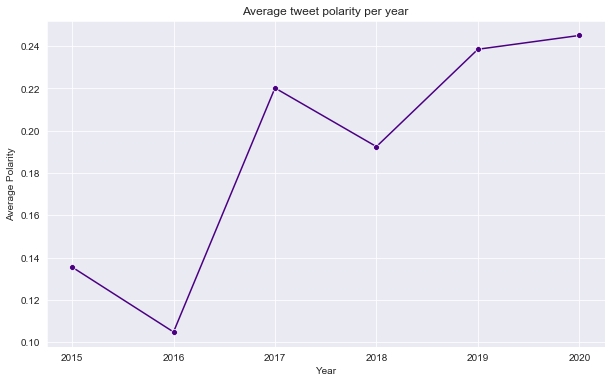

In [18]:
# Taking mean polarities of each year and plotting a line chart to show the trend
plt.figure(figsize=(10,6))
sns.lineplot(x=df[['created_at_year','polarity']].groupby('created_at_year').mean().index,
             y=df[['created_at_year','polarity']].groupby('created_at_year').mean()['polarity'],marker='o',
             color='indigo')
sns.set_style('darkgrid')
plt.title('Average tweet polarity per year')
plt.xlabel('Year')
plt.ylabel('Average Polarity')
plt.show()

It's fascinating that the mean tweet polarity has been increasing every year since he took his oath as the president of the United States of America. It'd be exciting to see what the average tweet polarity looks like at the end of 2020.

## Analyzing top 5 most mentioned twitter handles

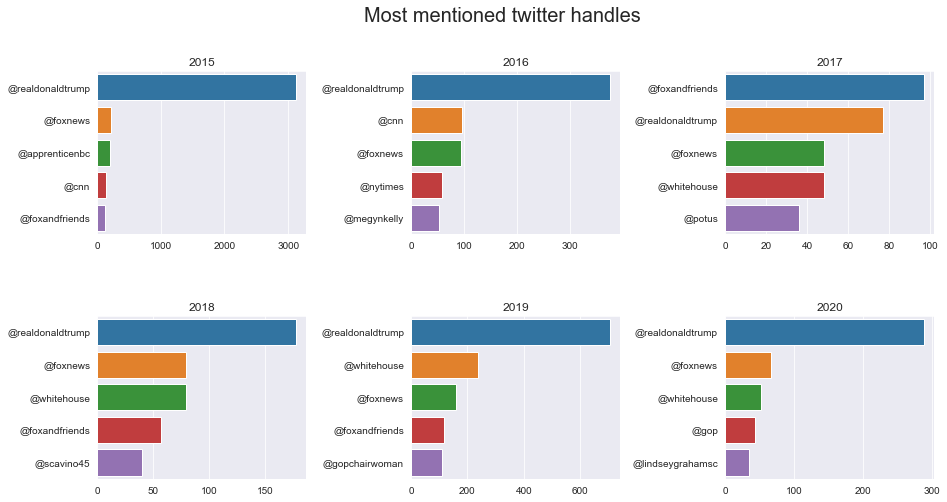

In [12]:
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust(
    wspace  =  0.5, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most mentioned twitter handles", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(allhandles['2015']).value_counts()[:5],
            y=pd.Series(allhandles['2015']).value_counts()[:5].index, ax=ax[0][0])
sns.barplot(x=pd.Series(allhandles['2016']).value_counts()[:5],
            y=pd.Series(allhandles['2016']).value_counts()[:5].index, ax=ax[0][1])
sns.barplot(x=pd.Series(allhandles['2017']).value_counts()[:5],
            y=pd.Series(allhandles['2017']).value_counts()[:5].index, ax=ax[0][2])
sns.barplot(x=pd.Series(allhandles['2018']).value_counts()[:5],
            y=pd.Series(allhandles['2018']).value_counts()[:5].index, ax=ax[1][0])
sns.barplot(x=pd.Series(allhandles['2019']).value_counts()[:5],
            y=pd.Series(allhandles['2019']).value_counts()[:5].index, ax=ax[1][1])
sns.barplot(x=pd.Series(allhandles['2020']).value_counts()[:5],
            y=pd.Series(allhandles['2020']).value_counts()[:5].index, ax=ax[1][2])

plt.show()

## Analysing frequently tweeted words

In [13]:
#tokenize
import nltk.tokenize
stop_words = nltk.corpus.stopwords.words('english')
token,tokenl={},[]
for y in yearlist:
    tweetstring=''
    for i in df[df['created_at_year']==y].index:
        tweetstring = tweetstring + ' ' + df.loc[i, 'text']
    #Cleaning the strings
    #Removing urls
    tstr = re.sub(r'http\S+', ' ', tweetstring.strip(punctuation).lower())
    #Removing punctuation and special characters
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t':
        tstr = tstr.replace(char, ' ')
    #tokenizing and removing stopwords
    tokenl=[w for w in nltk.tokenize.word_tokenize(tstr) if w not in stop_words]
    #Removing words with less than 2 characters
    #Also removing the word amp because it holds no meaning for us
    tokenl=[w for w in tokenl if len(w)>2 and w!='amp']
    token[y]=tokenl
token

{'2015': ['would',
  'like',
  'wish',
  'everyone',
  'happy',
  'healthy',
  'new',
  'year',
  'must',
  'work',
  'together',
  'finally',
  'make',
  'america',
  'safe',
  'great',
  'believe',
  'state',
  'department',
  'new',
  'year',
  'eve',
  'released',
  'hillary',
  'mails',
  'want',
  'end',
  'bad',
  'thank',
  'illinois',
  'let',
  'forget',
  'get',
  'family',
  'friends',
  'vote',
  '2016',
  'happy',
  'birthday',
  'son',
  'donaldjtrumpjr',
  'proud',
  'tbt',
  'would',
  'feel',
  'sorry',
  'jebbush',
  'badly',
  'campaign',
  'fact',
  'took',
  'millions',
  'hit',
  'ads',
  'makeamericagreatagain',
  'trump2016',
  'whispers34',
  'nevada',
  'poll',
  'donald',
  'trump',
  'ted',
  'cruz',
  'marco',
  'rubio',
  'via',
  'thelastrefuge2',
  'great',
  'news',
  'deggow',
  'heard',
  'year',
  'old',
  'man',
  'say',
  'would',
  'rather',
  'work',
  'donald',
  'trump',
  'bernie',
  'sanders',
  'time',
  'leave',
  'party',
  'wmsolomon',
 

In [14]:
nltk.download('wordnet')
nltk.download('universal_tagset')
lemmatized,unipos,noun,adjective=[{} for i in range(4)]
porter,lancaster,snowball = nltk.stem.PorterStemmer(),nltk.stem.LancasterStemmer(),nltk.stem.SnowballStemmer('english')
for key in token:
    x=token[key]
    #stemming
    pstemmed=[porter.stem(w) for w in x]
    lstemmed = [lancaster.stem(w) for w in x ]
    sstemmed = [snowball.stem(w) for w in x]
    print(key)
    print('porter stemmer total:',len(pstemmed),' root:',len(list(set(pstemmed))))
    print('lancaster stemmer total:',len(lstemmed),' root:',len(list(set(lstemmed))))
    print('snowball stemmer total:',len(sstemmed),' root:',len(list(set(sstemmed))))
    
    #lemmatizing
    wordnet = nltk.stem.WordNetLemmatizer()
    lemm = [wordnet.lemmatize(w) for w in x]
    print('wordnet lemmatizer total:',len(lemm),' root:',len(list(set(lemm))),'\n')
    
    #Parts of Speech Classification
    #after checking for misclassifications using parts of speech tagging, I found that universal tagset works better.
    uni_pos = nltk.pos_tag(lemm, tagset='universal')
    
    #Create seperate lists for nouns and adjectives
    word, pos = zip(*uni_pos)
    n,a=[],[]
    for i, w in enumerate(word):
        if pos[i] == 'NOUN':
           n.append(word[i])
        elif pos[i] == 'ADJ':
           a.append(word[i])
    
    lemmatized[key]=lemm
    unipos[key]=uni_pos
    noun[key]=n
    adjective[key]=a
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


2015
porter stemmer total: 77204  root: 12814
lancaster stemmer total: 77204  root: 12130
snowball stemmer total: 77204  root: 12760
wordnet lemmatizer total: 77204  root: 14021 

2016
porter stemmer total: 42518  root: 6397
lancaster stemmer total: 42518  root: 5893
snowball stemmer total: 42518  root: 6357
wordnet lemmatizer total: 42518  root: 7317 

2017
porter stemmer total: 30064  root: 4465
lancaster stemmer total: 30064  root: 4021
snowball stemmer total: 30064  root: 4425
wordnet lemmatizer total: 30064  root: 5333 

2018
porter stemmer total: 60878  root: 6561
lancaster stemmer total: 60878  root: 5884
snowball stemmer total: 60878  root: 6493
wordnet lemmatizer total: 60878  root: 7877 

2019
porter stemmer total: 108064  root: 9806
lancaster stemmer total: 108064  root: 8695
snowball stemmer total: 108064  root: 9716
wordnet lemmatizer total: 108064  root: 11921 

2020
porter stemmer total: 24104  root: 4488
lancaster stemmer total: 24104  root: 4042
snowball stemmer total:

It is evident that porter is the harshest of them all. If I had to choose a stemmer I'd choose lancaster because it is the least aggresive. In this case, wordnet lemmatizer is the best option.

After trying parts of speech tagging, I found that universal tagset works better in this case and hence went ahead with it.

Now we have lists of words, nouns and adjectives for all the years from 2015 to 2020

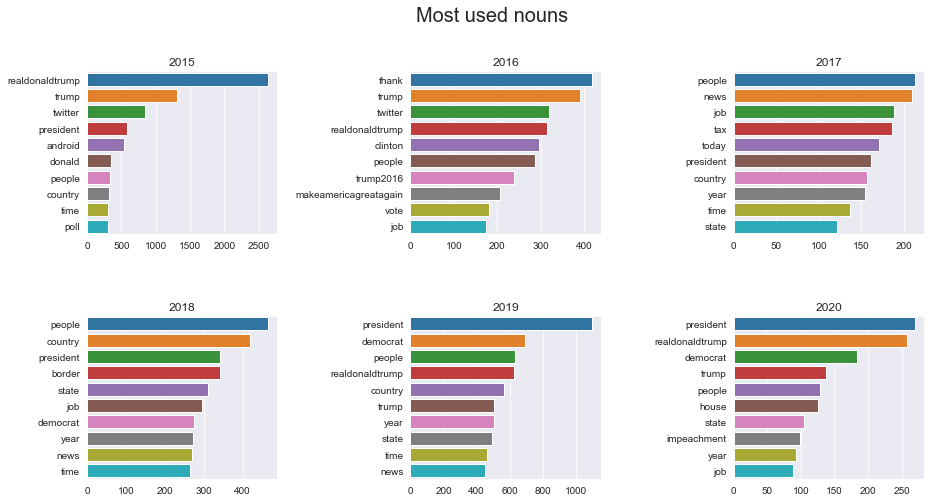

In [15]:
#Plot for nouns
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust(
    wspace  =  0.7, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most used nouns", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(noun['2015']).value_counts()[:10],
            y=pd.Series(noun['2015']).value_counts()[:10].index, ax=ax[0][0])
sns.barplot(x=pd.Series(noun['2016']).value_counts()[:10],
            y=pd.Series(noun['2016']).value_counts()[:10].index, ax=ax[0][1])
sns.barplot(x=pd.Series(noun['2017']).value_counts()[:10],
            y=pd.Series(noun['2017']).value_counts()[:10].index, ax=ax[0][2])
sns.barplot(x=pd.Series(noun['2018']).value_counts()[:10],
            y=pd.Series(noun['2018']).value_counts()[:10].index, ax=ax[1][0])
sns.barplot(x=pd.Series(noun['2019']).value_counts()[:10],
            y=pd.Series(noun['2019']).value_counts()[:10].index, ax=ax[1][1])
sns.barplot(x=pd.Series(noun['2020']).value_counts()[:10],
            y=pd.Series(noun['2020']).value_counts()[:10].index, ax=ax[1][2])

plt.show()

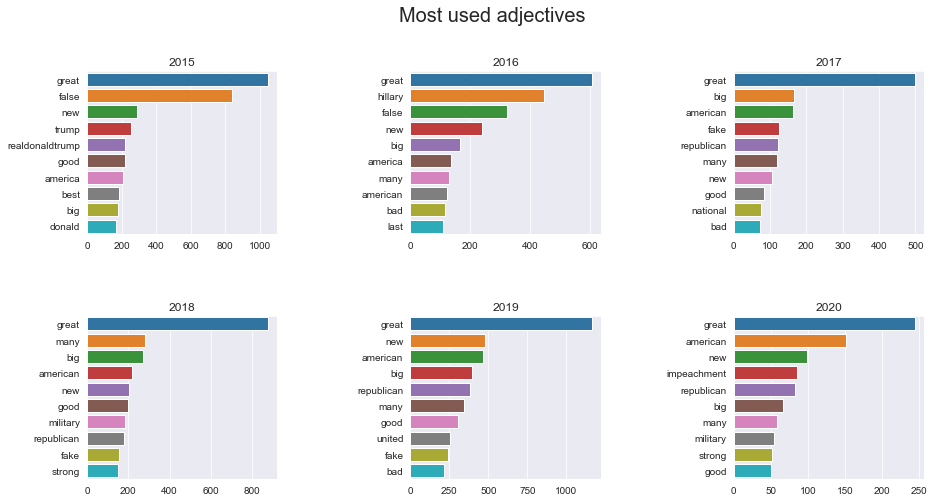

In [16]:
#Plot for adjectives
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust( 
    wspace  =  0.7, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most used adjectives", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(adjective['2015']).value_counts()[:10],
            y=pd.Series(adjective['2015']).value_counts()[:10].index, ax=ax[0][0])
sns.barplot(x=pd.Series(adjective['2016']).value_counts()[:10],
            y=pd.Series(adjective['2016']).value_counts()[:10].index, ax=ax[0][1])
sns.barplot(x=pd.Series(adjective['2017']).value_counts()[:10],
            y=pd.Series(adjective['2017']).value_counts()[:10].index, ax=ax[0][2])
sns.barplot(x=pd.Series(adjective['2018']).value_counts()[:10],
            y=pd.Series(adjective['2018']).value_counts()[:10].index, ax=ax[1][0])
sns.barplot(x=pd.Series(adjective['2019']).value_counts()[:10],
            y=pd.Series(adjective['2019']).value_counts()[:10].index, ax=ax[1][1])
sns.barplot(x=pd.Series(adjective['2020']).value_counts()[:10],
            y=pd.Series(adjective['2020']).value_counts()[:10].index, ax=ax[1][2])

plt.show()

It's not a surprise. The adjective that President trump uses the most is 'Great'.

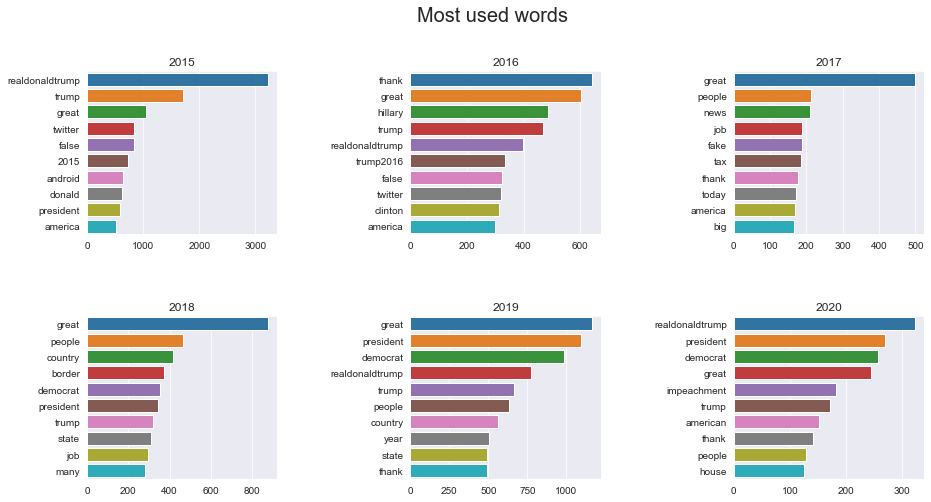

In [17]:
#Plot for most used words
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust( 
    wspace  =  0.7, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most used words", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(lemmatized['2015']).value_counts()[:10],
            y=pd.Series(lemmatized['2015']).value_counts()[:10].index, ax=ax[0][0])
sns.barplot(x=pd.Series(lemmatized['2016']).value_counts()[:10],
            y=pd.Series(lemmatized['2016']).value_counts()[:10].index, ax=ax[0][1])
sns.barplot(x=pd.Series(lemmatized['2017']).value_counts()[:10],
            y=pd.Series(lemmatized['2017']).value_counts()[:10].index, ax=ax[0][2])
sns.barplot(x=pd.Series(lemmatized['2018']).value_counts()[:10],
            y=pd.Series(lemmatized['2018']).value_counts()[:10].index, ax=ax[1][0])
sns.barplot(x=pd.Series(lemmatized['2019']).value_counts()[:10],
            y=pd.Series(lemmatized['2019']).value_counts()[:10].index, ax=ax[1][1])
sns.barplot(x=pd.Series(lemmatized['2020']).value_counts()[:10],
            y=pd.Series(lemmatized['2020']).value_counts()[:10].index, ax=ax[1][2])

plt.show()

### Submitted by Arpit Srivastava